In [1]:
#import os; import gdown
#nomeArq="banana-detection.zip"
#if not os.path.exists(nomeArq):
#  os.system("gdown 1J7IEFUlq8_ORnKGR3mthNjEQ5ecXmZY_")
#os.system("unzip -u "+nomeArq)

# DataLoad
# x_train, y_train, x_test, y_test

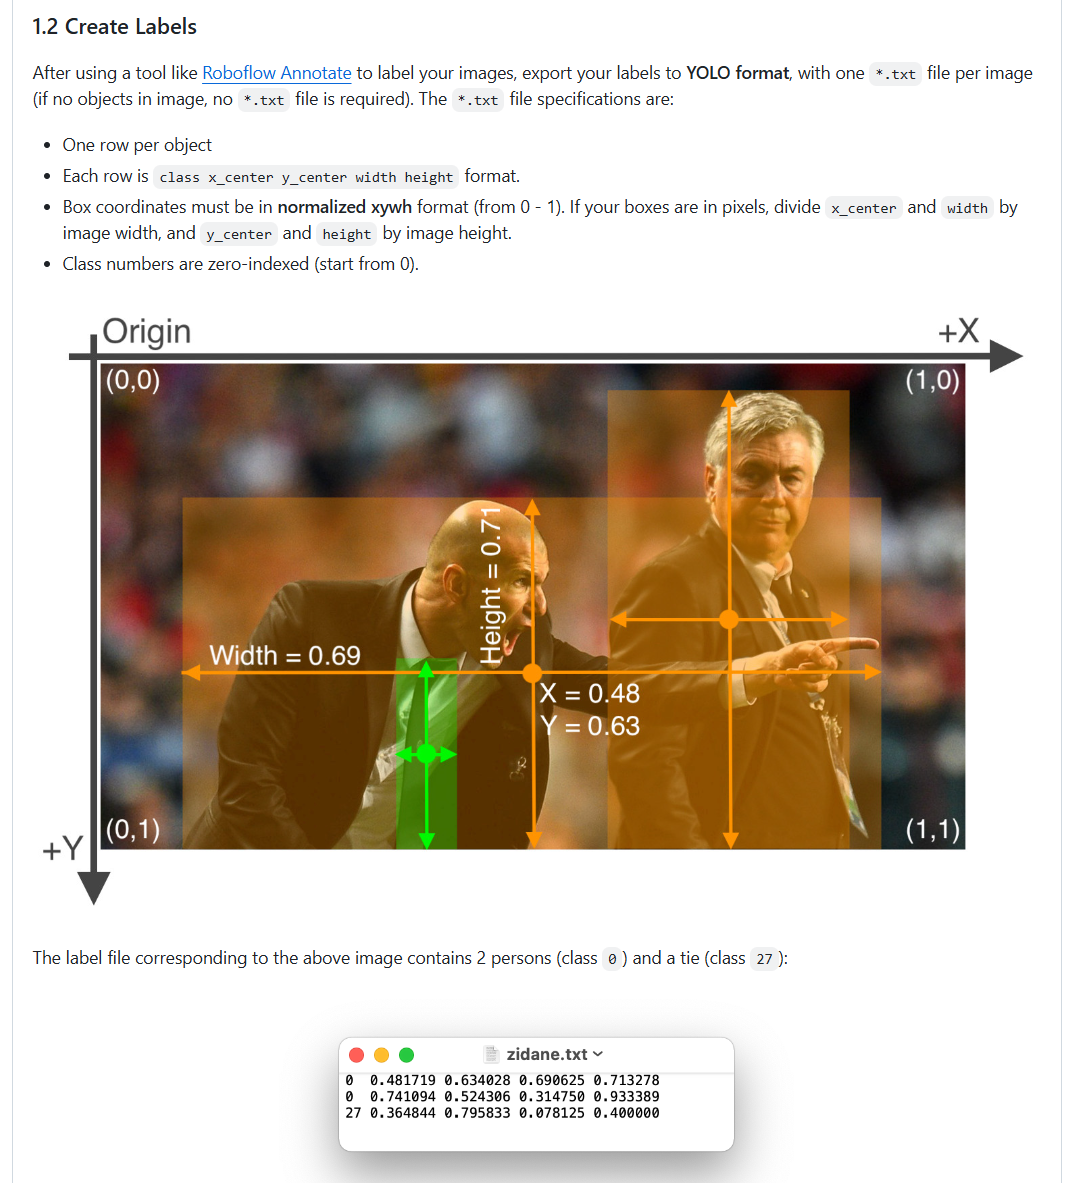

In [2]:
def bbox_xyxy_to_xywh(xmin, ymin, xmax, ymax):
    # Calculate center coordinates
    x_center = (xmin + xmax) / 2
    y_center = (ymin + ymax) / 2
    
    # Calculate width and height
    width = xmax - xmin
    height = ymax - ymin
    
    return (x_center, y_center, width, height)


In [3]:
import numpy as np
import csv
import cv2

img_size = 256

# Lê os arquivos CSV para dados de treinamento e validação
with open('C:/banana-detection/bananas_train/label.csv', 'r') as file:
    data_train = [row for row in csv.DictReader(file)]

with open('C:/banana-detection/bananas_val/label.csv', 'r') as file:
    data_test = [row for row in csv.DictReader(file)]

# Cria arrays para as imagens de treinamento
x_train = np.array([
    "C:/banana-detection/bananas_train/images/" + x.get('img_name') 
    for x in data_train
])

y_train = np.array([
    [int(x.get('xmin')), int(x.get('ymin')), int(x.get('xmax')), int(x.get('ymax'))] 
    for x in data_train
], dtype=np.int32)

y_train_bboxes = np.array([
    [[0, int(x.get('xmin')), int(x.get('ymin')), int(x.get('xmax')), int(x.get('ymax'))]] 
    for x in data_train
], dtype=np.int32) / img_size

# Cria arrays para as imagens de teste
x_test = np.array([
    "C:/banana-detection/bananas_val/images/" + x.get('img_name') 
    for x in data_test
])

y_test = np.array([
    [int(x.get('xmin')), int(x.get('ymin')), int(x.get('xmax')), int(x.get('ymax'))] 
    for x in data_test
], dtype=np.int32)

y_test_bboxes = np.array([
    [[0, int(x.get('xmin')), int(x.get('ymin')), int(x.get('xmax')), int(x.get('ymax'))]] 
    for x in data_test
], dtype=np.int32) / img_size


# Carregar as imagens usando OpenCV
x_test_img = [cv2.imread(image_path) for image_path in x_test]  # image_files deve ser uma lista de caminhos

In [4]:
import pandas as pd
# Assume x_train, y_train, x_test, y_test are already defined
data_train = pd.DataFrame({
    'filename': x_train,   # Full image paths
    'x_min': [label[0] for label in y_train],
    'y_min': [label[1] for label in y_train],
    'x_max': [label[2] for label in y_train],
    'y_max': [label[3] for label in y_train]
})

data_test = pd.DataFrame({
    'filename': x_test,   # Full image paths
    'x_min': [label[0] for label in y_test],
    'y_min': [label[1] for label in y_test],
    'x_max': [label[2] for label in y_test],
    'y_max': [label[3] for label in y_test]
})

data_test.head()

filename  x_min  y_min  x_max  y_max
0  C:/banana-detection/bananas_val/images/0.png    183     63    241    112
1  C:/banana-detection/bananas_val/images/1.png     26     86     79    133
2  C:/banana-detection/bananas_val/images/2.png    139    108    178    148
3  C:/banana-detection/bananas_val/images/3.png     20    130     63    170
4  C:/banana-detection/bananas_val/images/4.png     30    103     98    152

In [5]:
import os
import cv2

# Criar diretórios de anotações
base_dir = r'C:\\banana-detection\\'
train_images_dir = os.path.join(base_dir, 'bananas_train/images')
train_labels_dir = os.path.join(base_dir, 'bananas_train/labels')
val_images_dir = os.path.join(base_dir, 'bananas_val/images')
val_labels_dir = os.path.join(base_dir, 'bananas_val/labels')

# Criar os diretórios se não existirem
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Função para salvar anotações
def save_annotations(image_file, bboxes, labels_dir):
    filename = os.path.splitext(os.path.basename(image_file))[0] + '.txt'
    with open(os.path.join(labels_dir, filename), 'w') as f:
        for bbox in bboxes:
            class_id, x_min, y_min, x_max, y_max = bbox
            x_center, y_center, width, heigth = bbox_xyxy_to_xywh(x_min, y_min, x_max, y_max)
            f.write(f"{int(class_id)} {x_center} {y_center} {width} {heigth}\n")

# Exemplo de dados (substitua pelos seus dados reais)
# Dados de treino
train_image_files = x_train  # Exemplo de nomes de arquivos de imagens
train_bboxes = y_train_bboxes

# Dados de validação/teste
val_image_files = x_test  # Exemplo de nomes de arquivos de imagens
val_bboxes = y_test_bboxes

# Salvar anotações para o conjunto de treino
for image_file, bbox_list in zip(train_image_files, train_bboxes):
    save_annotations(os.path.join(train_images_dir, image_file), bbox_list, train_labels_dir)

# Salvar anotações para o conjunto de validação/teste
for image_file, bbox_list in zip(val_image_files, val_bboxes):
    save_annotations(os.path.join(val_images_dir, image_file), bbox_list, val_labels_dir)


In [6]:
yaml_content = f"""
path: {base_dir}  # Caminho para o dataset
train: bananas_train/images     # Subdiretório de treino
val: bananas_val/images         # Subdiretório de validação
nc: 1
names: ['banana']
bbox_format: 'xyxy'  # ou 'xywh'
"""

# Salvando o conteúdo no arquivo 'dataset.yaml'
dataset_path = base_dir + 'dataset.yaml'
with open(dataset_path, 'w') as yaml_file:
    yaml_file.write(yaml_content)

print(f"Arquivo criado em: {dataset_path}")

Arquivo criado em: C:\\banana-detection\\dataset.yaml


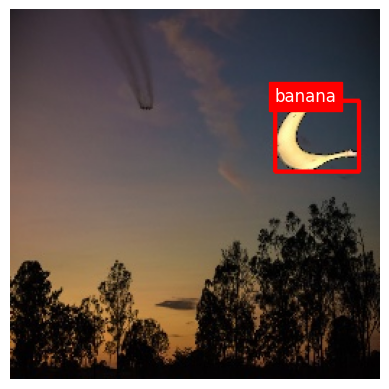

In [7]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


# Define the function to visualize annotations
def visualize_annotations(image_path, annotations):
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Draw bounding boxes
    for bbox in annotations:
        class_id, x1, y1, x2, y2  = bbox*img_size  # Assuming the bbox format is [x1, y1, x2, y2, class_id]
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Draw rectangle

        # Optionally, you can add class label as text
        plt.text(x1, y1, f'banana', color='white', fontsize=12, backgroundcolor='red')

    # Show image with annotations
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage:
# Assuming x_test is a list of image paths and y_test_bboxes is a list of bounding boxes for those images
visualize_annotations(x_test[0], y_test_bboxes[0])


In [8]:
#!pip install --user ultralytics


In [9]:
from ultralytics import YOLO
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ['TORCH_USE_CUDA_DSA'] = '1'

# Carregar o modelo YOLOv8
model = YOLO('yolov8n.pt')  # ou 'yolov8s.pt', 'yolov8m.pt', etc.



In [103]:
model.train(data=dataset_path, 
                      epochs=20,  # número de épocas
                      batch=16,  # tamanho do batch
                      imgsz=256,  # tamanho da imagem
                      project=base_dir,  # pasta do projeto
                      name='yolo-banana',  # nome do modelo
                      nms=True,
                      iou=0.45,
                      conf=0.25,
                      exist_ok=False)  # substituir se já existir

New https://pypi.org/project/ultralytics/8.3.12 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.8  Python-3.11.5 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\\banana-detection\\dataset.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=C:\\banana-detection\\, name=yolo-banana3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.45, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

train: Scanning C:\banana-detection\bananas_train\labels.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
val: Scanning C:\banana-detection\bananas_val\labels.cache... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]


Plotting labels to C:\banana-detection\yolo-banana3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 256 train, 256 val
Using 8 dataloader workers
Logging results to C:\banana-detection\yolo-banana3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      8.93G      1.038      2.327      1.007         15        256: 100%|██████████| 63/63 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]

                   all        100        100          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       3.1G     0.9319     0.9705     0.9732         16        256: 100%|██████████| 63/63 [00:09<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.69it/s]

                   all        100        100          1        0.5       0.75      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       3.1G      0.895     0.8481     0.9624         16        256: 100%|██████████| 63/63 [00:08<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all        100        100      0.974       0.97      0.991      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       3.1G      0.834     0.7987     0.9468         14        256: 100%|██████████| 63/63 [00:08<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]

                   all        100        100       0.98      0.984      0.994      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       3.1G     0.8259     0.7234     0.9409         12        256: 100%|██████████| 63/63 [00:08<00:00,  7.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]

                   all        100        100      0.969          1      0.989      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       3.1G      0.797      0.671     0.9357         13        256: 100%|██████████| 63/63 [00:08<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.64it/s]

                   all        100        100      0.969          1      0.991      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       3.1G     0.7311       0.62       0.91         13        256: 100%|██████████| 63/63 [00:08<00:00,  7.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]

                   all        100        100       0.98      0.998      0.994      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       3.1G     0.7053      0.593     0.9078          7        256: 100%|██████████| 63/63 [00:08<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.72it/s]

                   all        100        100      0.961      0.996      0.992      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       3.1G     0.6864     0.5476     0.9043         16        256: 100%|██████████| 63/63 [00:08<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all        100        100      0.998          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       3.1G     0.6441     0.5227     0.8917          9        256: 100%|██████████| 63/63 [00:08<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.68it/s]

                   all        100        100      0.989          1      0.995      0.932


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       3.1G     0.4952     0.4221      0.837          8        256: 100%|██████████| 63/63 [00:08<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all        100        100      0.999          1      0.995      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       3.1G     0.4757     0.4086     0.8325          8        256: 100%|██████████| 63/63 [00:08<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]

                   all        100        100      0.995          1      0.995      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       3.1G     0.4717     0.3931     0.8295          8        256: 100%|██████████| 63/63 [00:08<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.56it/s]

                   all        100        100      0.998          1      0.995      0.954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       3.1G     0.4532     0.3706     0.8311          8        256: 100%|██████████| 63/63 [00:08<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]

                   all        100        100          1          1      0.995      0.957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       3.1G     0.4541     0.3641     0.8312          8        256: 100%|██████████| 63/63 [00:08<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.55it/s]

                   all        100        100      0.999          1      0.995      0.958



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       3.1G     0.4277     0.3481     0.8265          8        256: 100%|██████████| 63/63 [00:08<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.56it/s]

                   all        100        100      0.994       0.99      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       3.1G     0.4087     0.3342     0.8209          8        256: 100%|██████████| 63/63 [00:08<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.66it/s]

                   all        100        100      0.998          1      0.995      0.967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       3.1G     0.3767     0.3119     0.8137          8        256: 100%|██████████| 63/63 [00:08<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]

                   all        100        100      0.998          1      0.995       0.97



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       3.1G       0.36     0.3018     0.8068          8        256: 100%|██████████| 63/63 [00:08<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.67it/s]

                   all        100        100      0.998          1      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       3.1G     0.3549     0.2949     0.8116          8        256: 100%|██████████| 63/63 [00:08<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.64it/s]

                   all        100        100      0.998          1      0.995      0.974



20 epochs completed in 0.061 hours.
Optimizer stripped from C:\banana-detection\yolo-banana3\weights\last.pt, 5.6MB
Optimizer stripped from C:\banana-detection\yolo-banana3\weights\best.pt, 5.6MB

Validating C:\banana-detection\yolo-banana3\weights\best.pt...
Ultralytics 8.3.8  Python-3.11.5 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)
Model summary (fused): 186 layers, 2,684,563 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.88it/s]


                   all        100        100      0.998          1      0.995      0.974
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to C:\banana-detection\yolo-banana3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001F1AE6D3950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [15]:
import os
import cv2
import matplotlib.pyplot as plt

def plot_images_from_folder(folder_path, num_images=20):
    """
    Plot images from a specified folder in a grid.

    Parameters:
        folder_path (str): Path to the folder containing images.
        num_images (int): Number of images to display (default is 20).
    """
    # Get a list of image files in the specified folder
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

    # Limit the number of images to the specified number
    image_files = image_files[:num_images]

    # Set up the plot
    columns = 5
    rows = (len(image_files) + columns - 1) // columns  # Calculate the number of rows needed
    fig, axes = plt.subplots(rows, columns, figsize=(15, 10))
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, image_file in enumerate(image_files):
        # Load the image using OpenCV
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)

        # Convert the image from BGR to RGB (OpenCV loads images in BGR format)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image in the corresponding subplot
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis labels
        axes[i].set_title(image_file)  # Show the image file name as the title

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



0: 256x256 1 banana, 0.5ms
1: 256x256 1 banana, 0.5ms
2: 256x256 1 banana, 0.5ms
3: 256x256 1 banana, 0.5ms
4: 256x256 1 banana, 0.5ms
5: 256x256 1 banana, 0.5ms
6: 256x256 1 banana, 0.5ms
7: 256x256 1 banana, 0.5ms
8: 256x256 1 banana, 0.5ms
9: 256x256 1 banana, 0.5ms
10: 256x256 1 banana, 0.5ms
11: 256x256 1 banana, 0.5ms
12: 256x256 1 banana, 0.5ms
13: 256x256 1 banana, 0.5ms
14: 256x256 1 banana, 0.5ms
15: 256x256 1 banana, 0.5ms
16: 256x256 1 banana, 0.5ms
17: 256x256 1 banana, 0.5ms
18: 256x256 1 banana, 0.5ms
19: 256x256 1 banana, 0.5ms
20: 256x256 1 banana, 0.5ms
21: 256x256 1 banana, 0.5ms
22: 256x256 1 banana, 0.5ms
23: 256x256 1 banana, 0.5ms
24: 256x256 1 banana, 0.5ms
25: 256x256 1 banana, 0.5ms
26: 256x256 1 banana, 0.5ms
27: 256x256 1 banana, 0.5ms
28: 256x256 1 banana, 0.5ms
29: 256x256 1 banana, 0.5ms
30: 256x256 1 banana, 0.5ms
31: 256x256 1 banana, 0.5ms
32: 256x256 1 banana, 0.5ms
33: 256x256 1 banana, 0.5ms
34: 256x256 1 banana, 0.5ms
35: 256x256 1 banana, 0.5ms
3

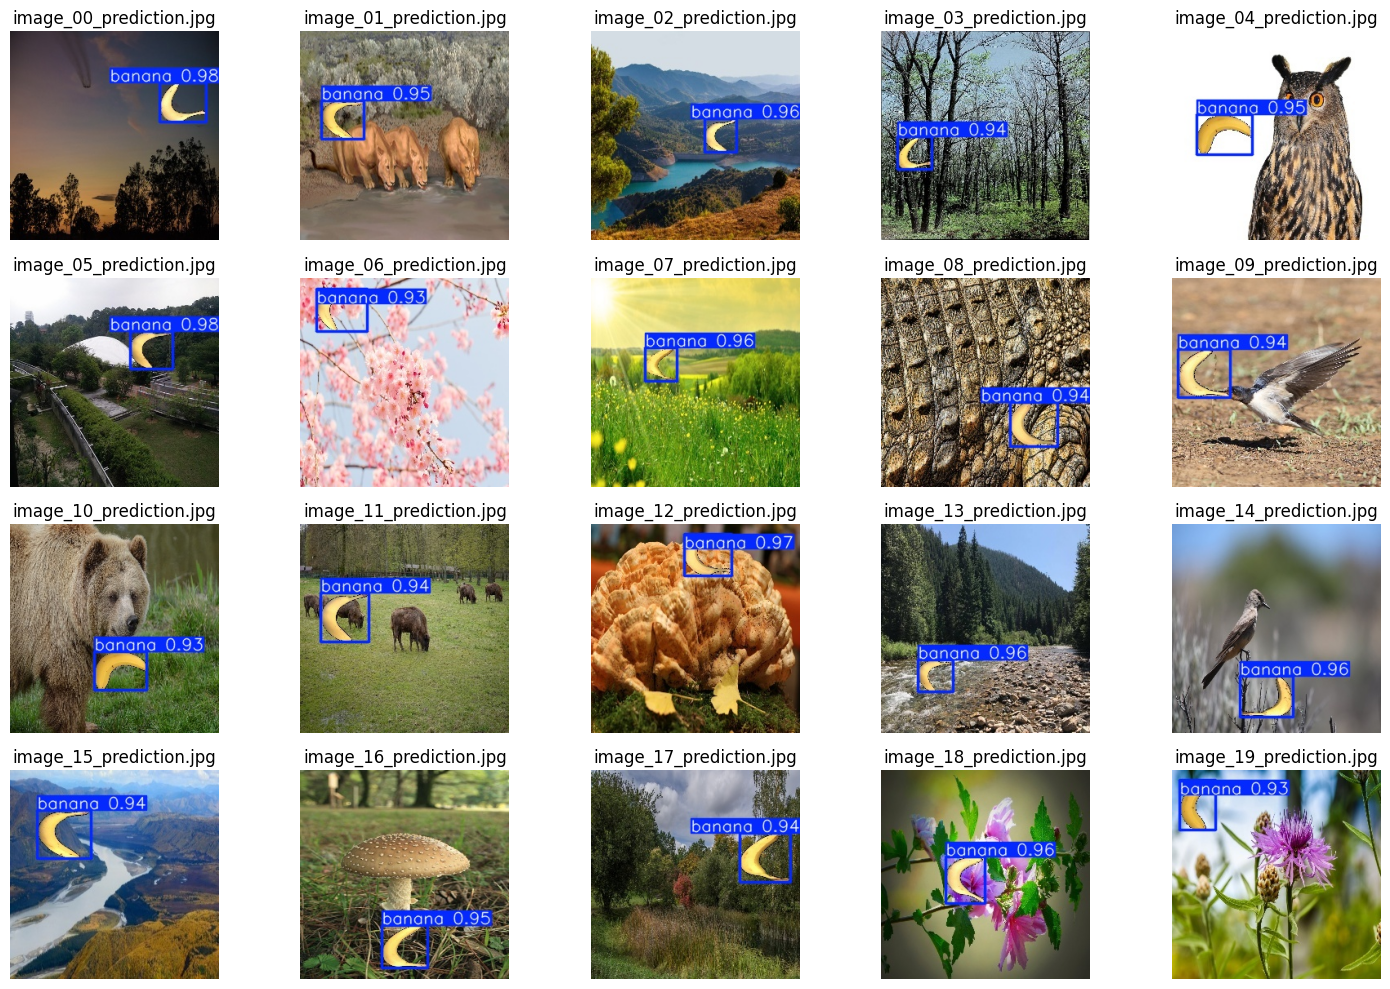

In [114]:
#results = model(x_test_img)  # Isso irá processar todas as imagens da lista
# Carregar o melhor modelo salvo
best_model = YOLO(os.path.join(base_dir,'yolo-banana','weights','best.pt'))

# Fazer previsões com o melhor modelo
results = best_model.predict(source=x_test_img, 
                              conf=0.85,  # confiança mínima
                              save=True,  # salvar resultados
                              project=os.path.join(base_dir, f'yolo-banana/predictions'),  # pasta de saída
                              name='predictions')  # nome da saída

# Iterar sobre os resultados e exibir as informações

y_pred = []
for i, result in enumerate(results):
    print(f"Resultados para {x_test[i]}:")

    # Exibir as caixas delimitadoras e as classes previstas
    #result[i].print()  # Exibe o resumo no console

    output_dir =  os.path.join(base_dir, 'output')
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Salvar as imagens com as previsões
    formatted_index = str(i).zfill(2)  # or use f"{i:02}" with f-strings
    image_filename = f"image_{formatted_index}_prediction.jpg"  # Use your desired extension
    
    result_file = os.path.join(output_dir, image_filename)
    result.save(result_file)  # Salva com as caixas desenhadas

    # Ou acessar mais detalhes como bounding boxes e confidências:
    boxes = result.boxes.xyxy  # Coordenadas das caixas delimitadoras
    confidences = result.boxes.conf  # Confidências das predições
    classes = result.boxes.cls  # Classes previstas
    
    int_tensor = boxes[0].int()  
    # Convert the integer tensor to a tuple
    int_tuple = tuple(int_tensor.tolist())
    y_pred.append(int_tuple)

    print("Caixas delimitadoras:", boxes)
    print("Confidências:", confidences)
    print("Classes previstas:", classes)
    
    
    
plot_images_from_folder(output_dir)

In [10]:
def show_mask(mask, random_color=True):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    return mask_image
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    


In [11]:
def generate_random_color():
    # Define the three colors as NumPy arrays
    color1 = np.array([0, 0, 255, 200])    # Blue
    color2 = np.array([0, 255, 0, 200])    # Green
    color3 = np.array([255, 0, 0, 200])    # Red
    
    # Create a 2D array of colors
    colors = np.array([color1, color2, color3])
    
    # Randomly select one color
    chosen_color = colors[np.random.randint(len(colors))]

    return tuple(chosen_color)  # Return as a tuple


In [12]:
import cv2
import numpy as np

def draw_contours_on_image(rgb_image, mask_img):
    """
    Draw contours on an RGB image while keeping the original image intact.
    
    Parameters:
        rgb_image (numpy.ndarray): Input image in RGB format.
        mask_img (numpy.ndarray): Image used to find contours.
    
    Returns:
        contour_image (numpy.ndarray): Image with smooth contours drawn.
    """
    # Check if the input image is valid
    if rgb_image is None or not isinstance(rgb_image, np.ndarray):
        raise ValueError("Invalid input image.")
    
    # Convert mask image to grayscale if it's in color
    if len(mask_img.shape) == 3:
        mask_img_gray = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
    else:
        mask_img_gray = mask_img  # Already grayscale

    # Apply a Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(mask_img_gray, (5, 5), 0)

    # Use Canny edge detection to find edges
    edges = cv2.Canny(blurred_image, 50, 150)

    # Find contours from the edges
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank mask for contours
    contour_mask = np.zeros_like(rgb_image)

    # Draw the contours on the blank mask
    #color = [np.random.randint(0, 255) for j in range(0, 3)]
    color = (0,0,0)
    cv2.drawContours(contour_mask, contours, -1, color, 3)  # Draw contours in green

    # Blend the contour mask with the original image
    contour_image = cv2.addWeighted(rgb_image, 1.0, contour_mask, 1, 0)  # Adjust the weights as necessary

    return contour_image


# Sam Segmentation (Segment Anything - Meta)

In [ ]:
import sys
from tensorflow.keras import ops
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

for i,input_image in enumerate(x_test_img):

    predictor.set_image(x_test_img[i])

    input_box = np.array([y_test[i]])
    (x1,y1,x2,y2) = y_test[i]

    masks, _, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        box=input_box[None, :],
        multimask_output=False,    
    )
    
    #mask = ops.convert_to_numpy(masks[0]) > 0.0
    
    background = x_test_img[i]

    output_mask = masks[0]#show_mask(masks[0])

    binary_mask = output_mask.astype(np.uint8) * 255
    #binary_mask = np.expand_dims(binary_mask, axis=2)

    gray_image = binary_mask

    # Convert the grayscale image to a color image by stacking
    # Create a random color image with the same dimensions
    color_image = np.zeros((256, 256, 3), dtype=np.uint8)

    # Fill each channel with random values
    color_image[..., 0] = binary_mask # Red channel 
    color_image[..., 1] = binary_mask # Green channel
    color_image[..., 2] = binary_mask # Blue channel

    
    show_out_mask = show_mask(output_mask)

    # Define a color with transparency (e.g., red with 50% transparency)
    color = generate_random_color()  # Red in BGR with 50% transparency
    show_out_mask[:] = show_out_mask * color  # Fill the overlay with the color

    # Create an overlay with only 3 channels for blending
    overlay_bgr = show_out_mask[:, :, :3]  # Keep only BGR channels
    alpha = show_out_mask[:, :, 3] / 255.0  # Get the alpha channel and normalize

    # Blend the images using the alpha channel
    combined = background * (1 - alpha[:, :, np.newaxis]) + overlay_bgr * alpha[:, :, np.newaxis]

    # Convert to uint8
    combined = combined.astype(np.uint8)
    
    colorR = [np.random.randint(0, 255) for j in range(0, 3)]    
    cv2.rectangle(combined, (x1, y1), (x2, y2), colorR, 2)
    countoured = draw_contours_on_image(combined, binary_mask)
    
    
    formatted_index = str(i).zfill(2)  # or use f"{i:02}" with f-strings
    image_filename = f"yolo-segmentation/sam/seg_{formatted_index}.png"  # Use your desired extension    
    cv2.imwrite(image_filename,countoured)

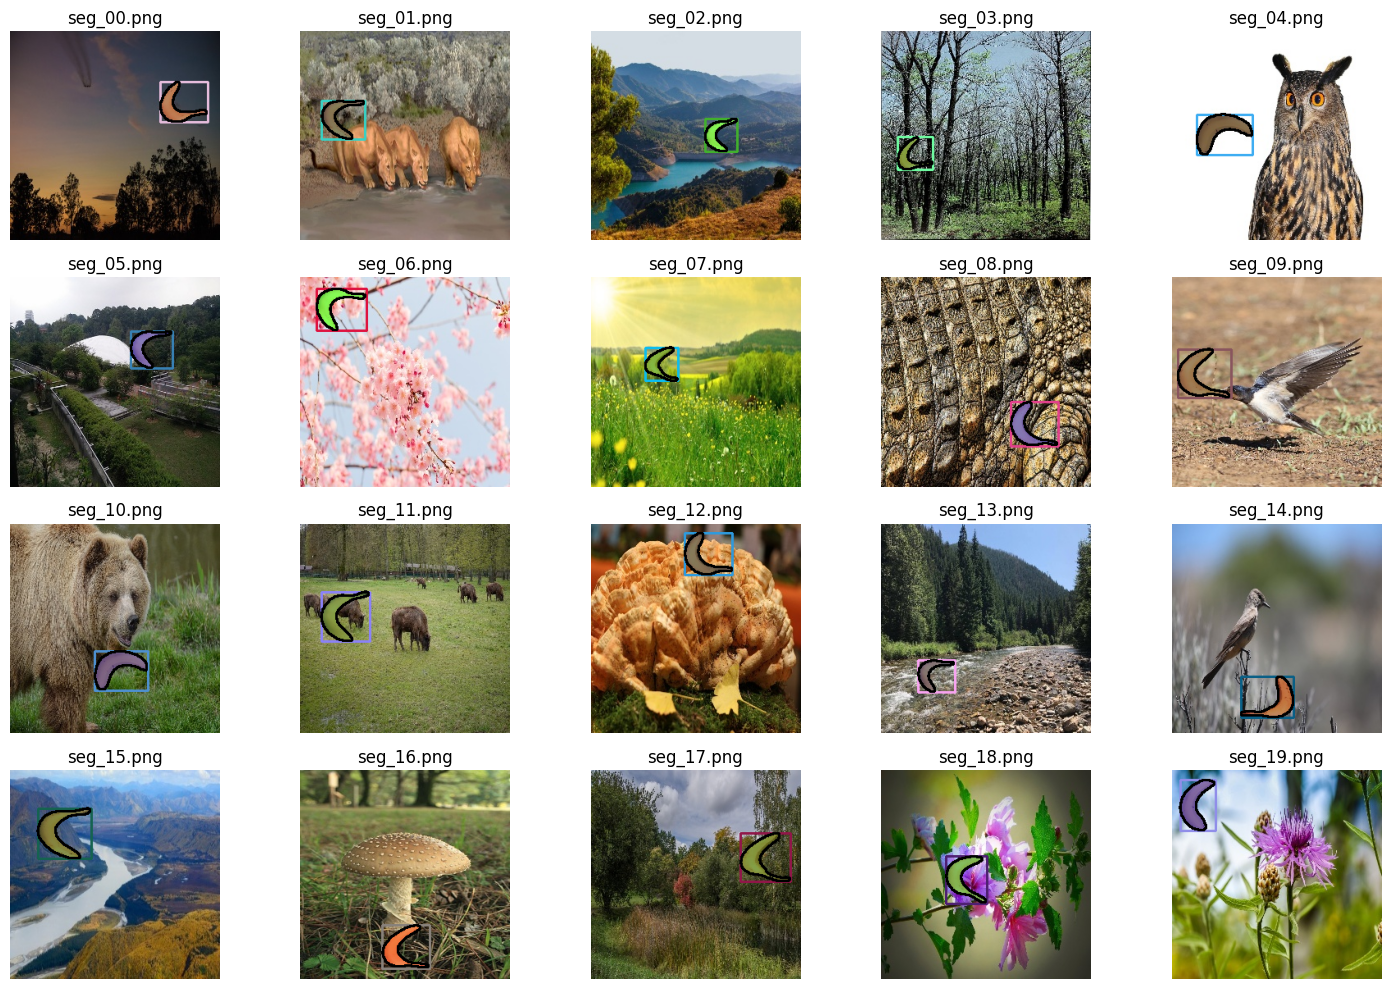

In [16]:
plot_images_from_folder('yolo-segmentation/sam/')

In [1]:
import torch
import cv2
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

# Carregar o checkpoint do SAM
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Especifique o caminho para seu checkpoint
model_type = "vit_h"  # Pode ser vit_h, vit_l, ou vit_b

# Verificar se GPU está disponível
device = "cuda" if torch.cuda.is_available() else "cpu"

# Carregar o modelo SAM
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

# Inicializar o gerador de máscaras automáticas (Automatic Mask Generator)
mask_generator = SamAutomaticMaskGenerator(sam)

# Carregar a imagem
image_path = "train_0.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Gerar máscaras automaticamente
masks = mask_generator.generate(image_rgb)

# Exibir e salvar as máscaras geradas
for i, mask in enumerate(masks):
    mask_img = mask["segmentation"].astype("uint8") * 255  # Converter para binário (0 ou 255)
    
    # Salvar a máscara como imagem
    cv2.imwrite(f"mascara_automatica_{i}.png", mask_img)
    
    # Opcional: Sobrepor a máscara à imagem original para visualização
    color_mask = cv2.cvtColor(mask_img, cv2.COLOR_GRAY2BGR)
    combined_image = cv2.addWeighted(image_rgb, 0.6, color_mask, 0.4, 0)
    
    # Exibir a imagem com a máscara
    cv2.imshow(f"Masked Image {i}", combined_image)
    cv2.waitKey(0)  # Pressione qualquer tecla para avançar

cv2.destroyAllWindows()


FileNotFoundError: [Errno 2] No such file or directory: 'sam_vit_h_4b8939.pth'

In [110]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Calcular a Média Absoluta do Erro
mae = mean_absolute_error(y_test, y_pred)

# Imprimir o resultado
print(f"Média Absoluta do Erro das Bboxes (MAE): {mae}")


Média Absoluta do Erro das Bboxes (MAE): 0.5700000000000001


In [111]:
def calculate_iou(box1, box2):
    """
    Calcula a IoU (Intersection over Union) entre duas caixas delimitadoras.
    
    Args:
        box1: Caixa delimitadora no formato [x1, y1, x2, y2].
        box2: Caixa delimitadora no formato [x1, y1, x2, y2].

    Returns:
        iou: Valor de IoU.
    """
    # Coordenadas da interseção
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])
    
    # Dimensões da interseção
    inter_area = max(0, x2_inter - x1_inter + 1) * max(0, y2_inter - y1_inter + 1)
    
    # Áreas das caixas
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)
    
    # Área da união
    union_area = box1_area + box2_area - inter_area
    
    # Calcula IoU
    iou = inter_area / union_area if union_area > 0 else 0
    return iou

def calculate_mean_and_min_iou(y_test, y_pred):
    """
    Calcula a IoU média e mínima entre duas listas de caixas delimitadoras.
    
    Args:
        y_test: Lista de caixas reais (ground truth) no formato [x1, y1, x2, y2].
        y_pred: Lista de caixas previstas no formato [x1, y1, x2, y2].
    
    Returns:
        mean_iou: A IoU média entre as caixas.
        min_iou: A menor IoU entre as caixas.
    """
    ious = []
    for i in range(len(y_test)):
        iou = calculate_iou(y_test[i], y_pred[i])
        ious.append(iou)
    
    # Calcula a média e o mínimo das IoUs
    mean_iou = np.mean(ious) if len(ious) > 0 else 0
    min_iou = np.min(ious) if len(ious) > 0 else 0
    return mean_iou, min_iou

# Calculando a IoU média e mínima
mean_iou, min_iou = calculate_mean_and_min_iou(y_test, y_pred)

print("IoU média:", mean_iou)
print("IoU mínima:", min_iou)


IoU média: 0.9556177740341992
IoU mínima: 0.8898305084745762


# Sem Treino


0: 256x256 1 kite, 2.4ms
1: 256x256 4 birds, 2 cows, 2.4ms
2: 256x256 1 bird, 2.4ms
3: 256x256 1 frisbee, 2.4ms
4: 256x256 1 bird, 1 horse, 1 frisbee, 1 sports ball, 1 kite, 2.4ms
5: 256x256 1 person, 1 train, 2.4ms
6: 256x256 (no detections), 2.4ms
7: 256x256 1 bird, 2.4ms
8: 256x256 1 elephant, 1 banana, 2.4ms
9: 256x256 1 bird, 2.4ms
10: 256x256 1 sheep, 1 bear, 2.4ms
11: 256x256 8 sheeps, 3 cows, 2.4ms
12: 256x256 1 sheep, 1 sandwich, 2.4ms
13: 256x256 (no detections), 2.4ms
14: 256x256 2 birds, 1 banana, 2.4ms
15: 256x256 1 bird, 2.4ms
16: 256x256 1 bench, 2.4ms
17: 256x256 1 giraffe, 1 banana, 2.4ms
18: 256x256 1 potted plant, 2.4ms
19: 256x256 1 bird, 2.4ms
20: 256x256 1 banana, 2.4ms
21: 256x256 2 birds, 2.4ms
22: 256x256 (no detections), 2.4ms
23: 256x256 2 birds, 2.4ms
24: 256x256 1 bowl, 1 carrot, 1 dining table, 2.4ms
25: 256x256 1 potted plant, 2.4ms
26: 256x256 1 kite, 2.4ms
27: 256x256 1 frisbee, 2.4ms
28: 256x256 1 kite, 2.4ms
29: 256x256 1 frisbee, 2.4ms
30: 256x256 1

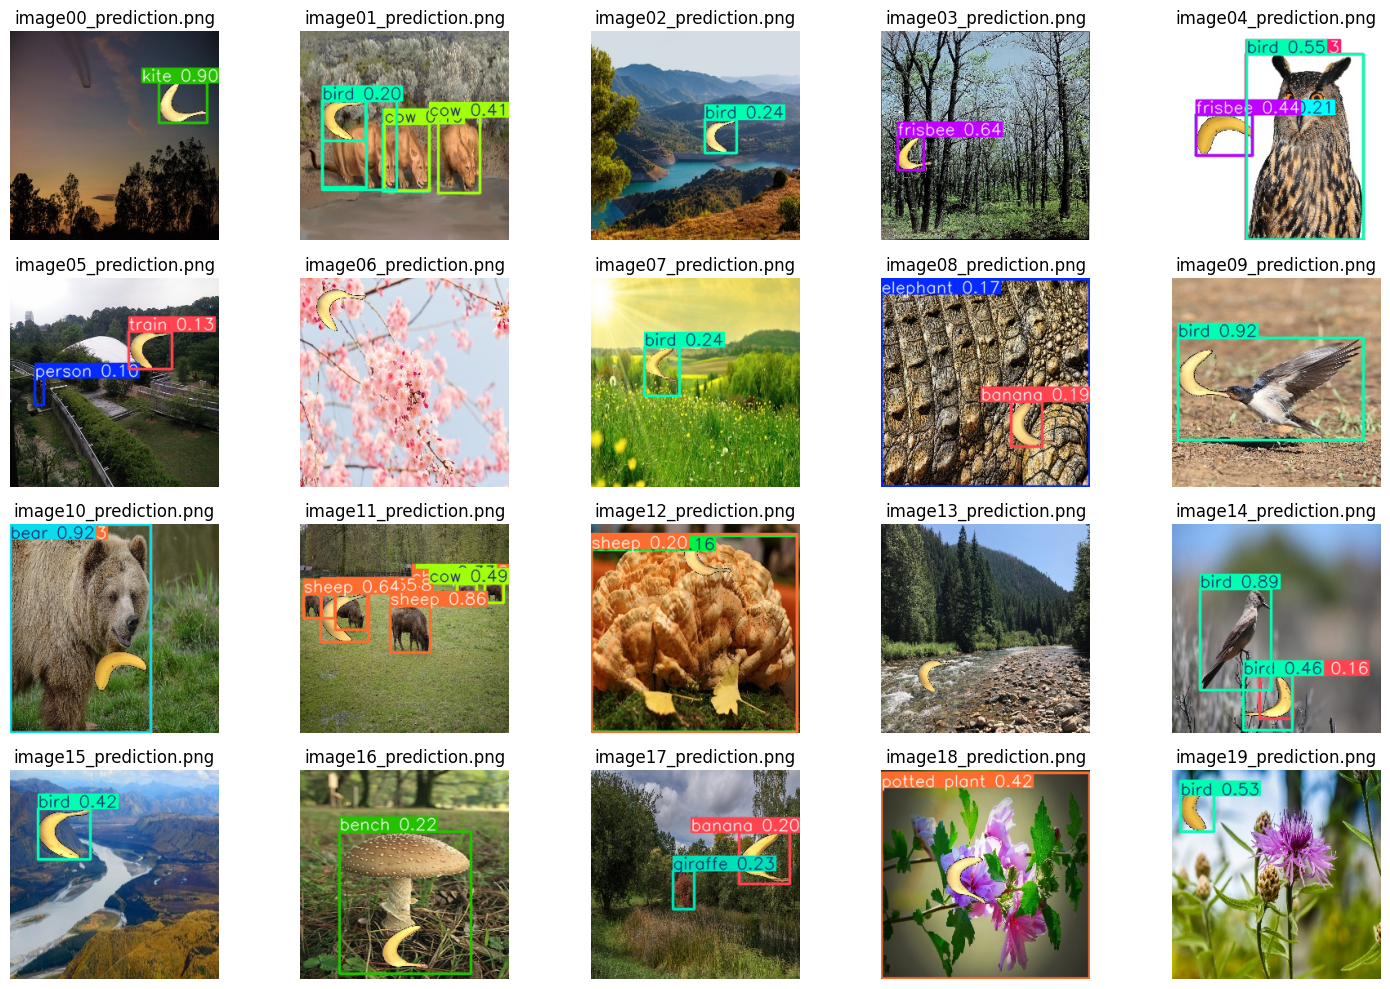

In [17]:
model = YOLO('yolov8n.pt')  # Change the model as necessary

# Specify classes to detect

#banana_index = list(model.names.values()).index('bird')

# Fazer previsões com o melhor modelo
results = model.predict(source=x_test_img,
                              #classes=[banana_index],
                              conf=0.1,  # confiança mínima
                              imgsz=256,
                              save=True,  # salvar resultados
                              project=base_dir,  # pasta de saída
                              name='predictions_notrain')  # nome da saída

# Iterar sobre os resultados e exibir as informações

y_pred = []
for i, result in enumerate(results):
    print(f"Resultados para {x_test[i]}:")

    # Exibir as caixas delimitadoras e as classes previstas
    #result[i].print()  # Exibe o resumo no console

    output_dir =  os.path.join(base_dir, 'output-notrain')
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Salvar as imagens com as previsões
    formatted_index = str(i).zfill(2)  # or use f"{i:02}" with f-strings
    image_filename = f"image{formatted_index}_prediction.png"  # Use your desired extension    
    result_file = os.path.join(output_dir, image_filename)
    result.save(result_file)  # Salva com as caixas desenhadas

    # Ou acessar mais detalhes como bounding boxes e confidências:
    boxes = result.boxes.xyxy  # Coordenadas das caixas delimitadoras
    confidences = result.boxes.conf  # Confidências das predições
    classes = result.boxes.cls  # Classes previstas
    if len(boxes) > 0:
        int_tensor = boxes[0].int()  
        # Convert the integer tensor to a tuple
        int_tuple = tuple(int_tensor.tolist())
        y_pred.append(int_tuple)

    print("Caixas delimitadoras:", boxes)
    print("Confidências:", confidences)
    print("Classes previstas:", classes)
    
plot_images_from_folder(output_dir)